# Case study on Credit Risk

# Context: 
Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to 
be considered before approving the loan of an applicant.Dream Housing Finance company deals in all home loans. They have presence
across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer 
eligibility for loan.

# Objective:
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online 
application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History 
and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan 
amount so that they can specifically target these customers. Here they have provided a partial data set.

Dataset:

* Variable	      Description
* Loan_ID	          Unique Loan ID
* Gender	          Male/ Female
* Married	          Applicant married (Y/N)
* Dependents	      Number of dependents
* Education	      Applicant Education (Graduate/ Under Graduate)
* Self_Employed	  Self employed (Y/N)
* ApplicantIncome	  Applicant income
* CoapplicantIncome Coapplicant income
* LoanAmount	      Loan amount in thousands
* Loan_Amount_Term  Term of loan in months
* Credit_History	  credit history meets guidelines
* Property_Area	  Urban/ Semi Urban/ Rural
* Loan_Status	      Loan approved (Y/N)

In [5]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns



from sklearn.model_selection import train_test_split

import numpy as np
import os,sys


# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [7]:
df = pd.read_csv('../Sample CSV/CreditRisk-1.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [8]:
cr_df = df.drop('Loan_ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [9]:
cr_df['Loan_Amount_Term'].value_counts(normalize=True)

Loan_Amount_Term
360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
240.0    0.006667
84.0     0.006667
120.0    0.005000
60.0     0.003333
36.0     0.003333
12.0     0.001667
Name: proportion, dtype: float64

<Axes: ylabel='count'>

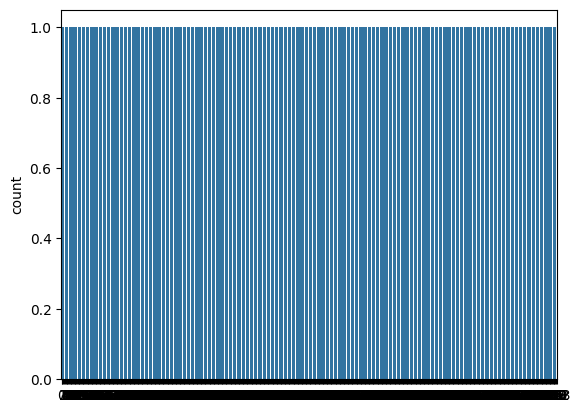

In [10]:
sns.countplot(cr_df['Loan_Amount_Term'])

In [11]:
#The Loan_Amount_Term is highly skewed - so we will delete this column
cr_df.drop(['Loan_Amount_Term'], axis=1, inplace=True)

In [12]:
cr_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# every column's missing value is replaced with 0 respectively
cr_df = cr_df.dropna(axis=0)
#cr_df = cr_df.replace({'NaN':df.median()})
cr_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187,1.0,Urban,1


In [14]:
#Lets analysze the distribution of the various attribute
cr_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,511.0,5308.146771,5561.209487,150.0,2885.5,3858.0,5820.0,81000.0
CoapplicantIncome,511.0,1561.997886,2559.383166,0.0,0.0,1086.0,2253.5,33837.0
LoanAmount,511.0,138.776908,82.889278,0.0,97.5,125.0,165.5,600.0
Credit_History,511.0,0.843444,0.363738,0.0,1.0,1.0,1.0,1.0
Loan_Status,511.0,0.679061,0.467295,0.0,0.0,1.0,1.0,1.0


<Axes: xlabel='Loan_Status'>

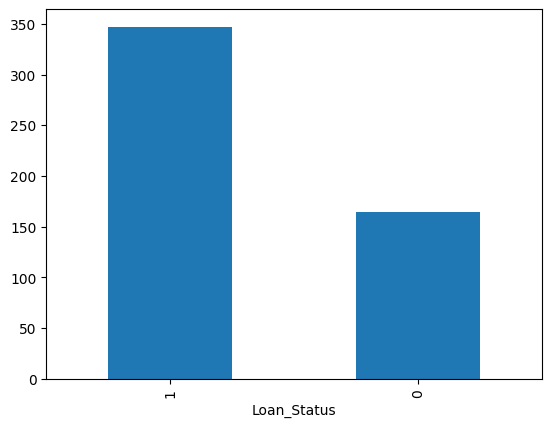

In [15]:
cr_df['Loan_Status'].value_counts().plot(kind='bar')

In [16]:
cr_df['Loan_Status'].value_counts(normalize=True)

Loan_Status
1    0.679061
0    0.320939
Name: proportion, dtype: float64

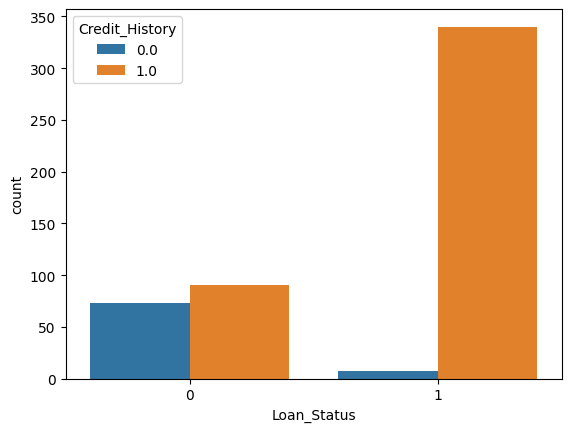

In [17]:
ax = sns.countplot(x="Loan_Status", hue="Credit_History", data=cr_df)

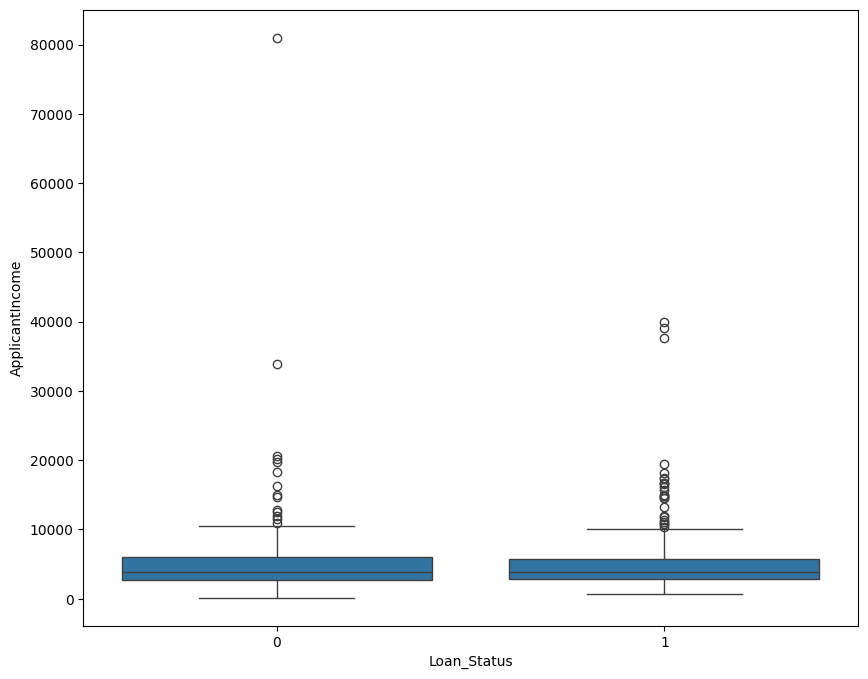

In [18]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(y="ApplicantIncome", x="Loan_Status", data=cr_df)

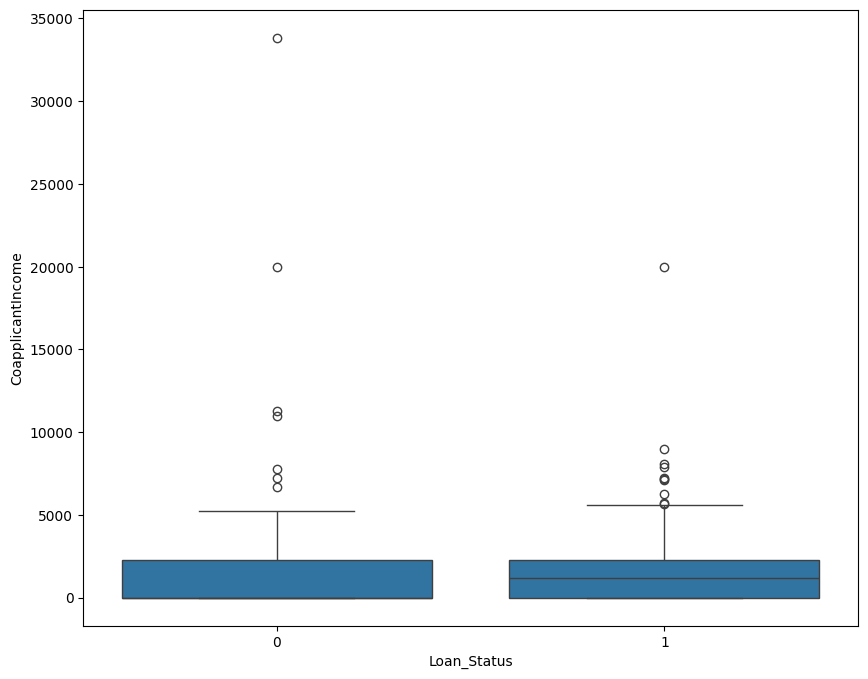

In [19]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(y="CoapplicantIncome", x="Loan_Status", data=cr_df)

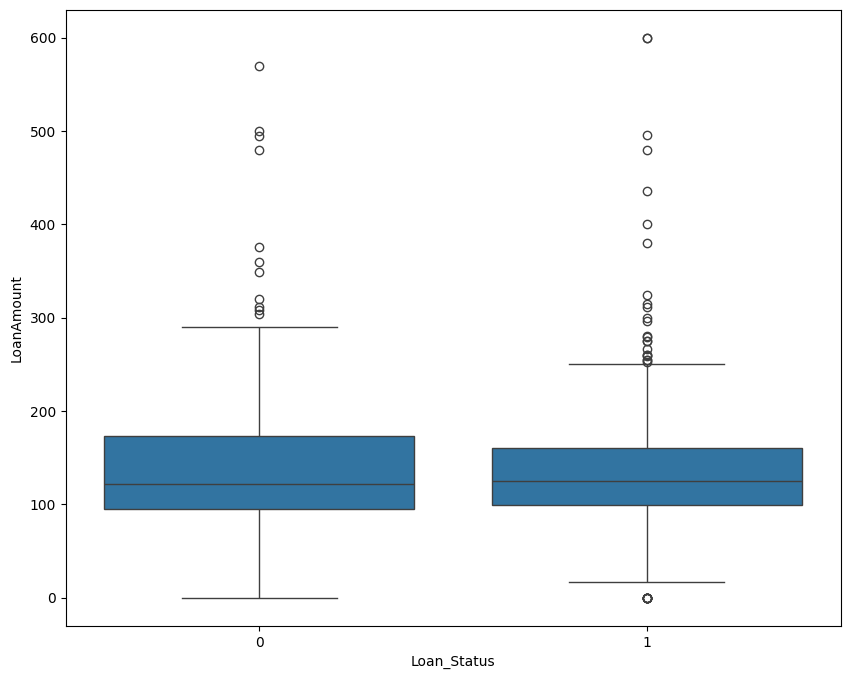

In [20]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(y="LoanAmount", x="Loan_Status", data=cr_df)

In [21]:
# Let us look at the target column which is 'Loan_Status' to understand how the data is distributed amongst the various values
cr_df.groupby(["Loan_Status"]).mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
#Convert X & Y variable to a categorical variable as relevant
cr_df['Loan_Status'] = cr_df['Loan_Status'].astype('category')
cr_df['Credit_History'] = cr_df['Credit_History'].astype('category')

In [ ]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             511 non-null    object  
 1   Married            511 non-null    object  
 2   Dependents         511 non-null    object  
 3   Education          511 non-null    object  
 4   Self_Employed      511 non-null    object  
 5   ApplicantIncome    511 non-null    int64   
 6   CoapplicantIncome  511 non-null    float64 
 7   LoanAmount         511 non-null    int64   
 8   Credit_History     511 non-null    category
 9   Property_Area      511 non-null    object  
 10  Loan_Status        511 non-null    category
dtypes: category(2), float64(1), int64(2), object(6)
memory usage: 61.1+ KB


**There is a slight imbalance in the data**

## Model building

In [ ]:
## Define X and Y variables
X = cr_df.drop('Loan_Status', axis=1)
Y = cr_df[['Loan_Status']]

In [ ]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,0,1,0,0,0,0,0,0,1,0,1
1,4583,1508.0,128,1,1,1,0,0,0,0,1,0,0
2,3000,0.0,66,1,1,0,0,0,0,1,1,0,1
3,2583,2358.0,120,1,1,0,0,0,1,0,1,0,1
4,6000,0.0,141,1,0,0,0,0,0,0,1,0,1


In [ ]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Build the logistic regression model
logreg = LogisticRegression(max_iter=1000)

In [ ]:
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction

In [ ]:
#Predict for test set
pred_test = logreg.predict(X_test)

In [ ]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [ ]:
#Predict for train set
pred_train = logreg.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(y_test, pred_test)

print('Test Accuracy: ',np.round(test_accuracy,2))

Test Accuracy:  0.82


In [ ]:
train_accuracy=accuracy_score(y_train, pred_train)

print('Test Accuracy: ',np.round(train_accuracy,2))

Test Accuracy:  0.82


## Confusion matrix

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("confusion matrix_train_data = \n",mat_train)

confusion matrix_train_data = 
 [[ 51  61]
 [  5 240]]


In [ ]:
mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix_test_data = \n",mat_test)

confusion matrix_test_data = 
 [[27 25]
 [ 3 99]]


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     

# ax= plt.subplot()
# sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# # labels, title and ticks
# ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
# ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

## ROC Curve

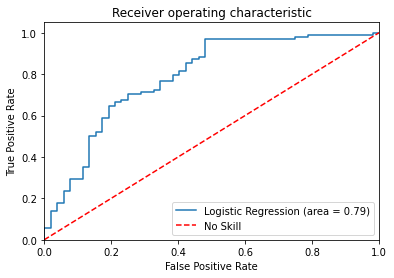

In [ ]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Sensitivity = TruePositive / (TruePositive + FalseNegative)
#### Specificity = TrueNegative / (FalsePositive + TrueNegative)


#### Sensitivity = True Positive Rate
#### Specificity = 1 – False Positive Rate

#### G-Mean = sqrt(Sensitivity * Specificity)

Best Threshold=0.730389, G-Mean=0.728


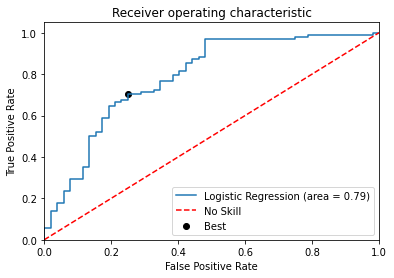

In [ ]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='No Skill')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Precission recall curve

Best Threshold=0.511305, F-Score=0.876


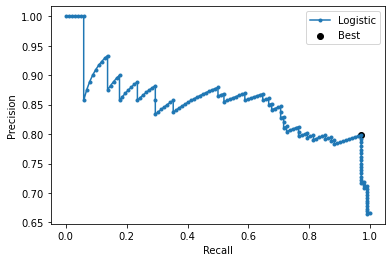

In [ ]:
from sklearn.metrics import precision_recall_curve
yhat=logreg.predict_proba(X_test)[:,1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
# no_skill = len(y_test[y_test==1]) / len(y_test)
# plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()